In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

C:\Users\kaung\AppData\Local\Temp\ipykernel_16364\2596413469.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Specify the file path
file_path = r"normalized-data.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify that it's loaded correctly
print(df.head())

        id  no_of_bed  no_of_bath  neighbourhoodID  room_type_ID  price  \
0  13188.0          2         1.0               16             1    150   
1  13221.0          2         1.0               16             1    120   
2  13358.0          1         1.0                2             1    165   
3  13490.0          1         1.0                8             1    150   
4  14267.0          2         1.0                8             1    150   

   number_of_reviews  rating  licenseID  calendar.count_demand  
0                283    4.84          2                    101  
1                 15    4.73          4                      2  
2                493    4.68          2                    220  
3                101    4.93          4                    273  
4                 33    4.76          2                    348  


In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['id']))

In [4]:
# Define clustering algorithm (K-Means in this case)
kmeans = KMeans(n_clusters=3, random_state=42)

# Define number of folds for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

kmeans_silhouette_scores = []

# Perform cross-validation with stratification
for train_index, test_index in skf.split(X, np.zeros(len(X))):
    X_train, X_test = X[train_index], X[test_index]

    # Fit clustering model on training data
    kmeans.fit(X_train)

    # Predict clusters on test data
    kmeans_labels = kmeans.predict(X_test)

    # Calculate silhouette score to evaluate clustering performance
    kmeans_silhouette_scores.append(silhouette_score(X_test, kmeans_labels))

# Calculate average silhouette score across all folds
ave_kmean_silhouette_score = np.mean(kmeans_silhouette_scores)
print("Average Silhouette Score:", ave_kmean_silhouette_score)

Average Silhouette Score: 0.19727159664078842


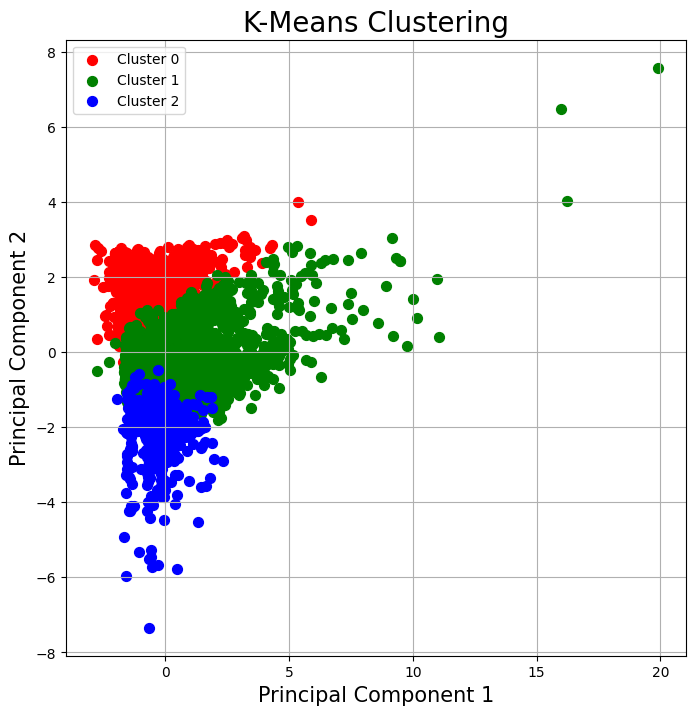

In [5]:
# Fit K-Means clustering model
kmeans.fit(X)

# Predict clusters for all data points
labels = kmeans.predict(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Concatenate principal components with cluster labels
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': labels})], axis=1)

# Plot clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('K-Means Clustering', fontsize=20)

targets = np.unique(labels)  # Unique cluster labels
colors = ['r', 'g', 'b']  # Assuming maximum of 3 clusters for visualization
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50,
               label=f'Cluster {target}')

ax.legend()
ax.grid()

# Show plot
plt.show()

In [6]:
# Define Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Define number of folds for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

agg_silhouette_scores = []

# Perform cross-validation with stratification
for train_index, test_index in skf.split(X, np.zeros(len(X))):
    X_train, X_test = X[train_index], X[test_index]

    # Fit clustering model on training data
    agg_clustering.fit(X_train)

    # Predict clusters on test data
    agg_labels = agg_clustering.fit_predict(X_test)

    # Calculate silhouette score to evaluate clustering performance
    agg_silhouette_scores.append(silhouette_score(X_test, agg_labels))

# Calculate average silhouette score across all folds
ave_agg_silhouette_score = np.mean(agg_silhouette_scores)
print("Average Silhouette Score:", ave_agg_silhouette_score)


Average Silhouette Score: 0.2008994045640317


In [7]:
best_model = "K-Means" if ave_kmean_silhouette_score < ave_agg_silhouette_score else "Agglomerative Clustering"
print("Best Model:", best_model)

Best Model: K-Means
